In [1]:
!pip install lightgbm==3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.6 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEST/input_files/distan_lat42.896lon-8.415p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [3]:
import pandas as pd

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEST/input_files/LESTY2018Y2022.csv",
                          usecols = ["time","visibility_o"],
                          parse_dates=["time"]).set_index("time")

station["visibility_o"].describe()

count    90838.000000
mean      8681.925141
std       2609.865894
min         48.000000
25%       8996.000000
50%       9994.000000
75%       9994.000000
max       9994.000000
Name: visibility_o, dtype: float64

In [4]:
station["visibility_o"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n))

visibility_o
9994.0    74%
7998.0     3%
8996.0     3%
6003.0     3%
5005.0     3%
7001.0     2%
2993.0     2%
4007.0     2%
1996.0     1%
2494.0     1%
3492.0     1%
1497.0     1%
4506.0     1%
805.0      0%
193.0      0%
402.0      0%
306.0      0%
499.0      0%
595.0      0%
1207.0     0%
901.0      0%
97.0       0%
692.0      0%
1802.0     0%
2800.0     0%
998.0      0%
1400.0     0%
145.0      0%
2205.0     0%
257.0      0%
3203.0     0%
354.0      0%
1706.0     0%
1094.0     0%
1593.0     0%
2704.0     0%
3798.0     0%
2301.0     0%
48.0       0%
1304.0     0%
2398.0     0%
1899.0     0%
3299.0     0%
2607.0     0%
4796.0     0%
3396.0     0%
3701.0     0%
2897.0     0%
2092.0     0%
3605.0     0%
4200.0     0%
4699.0     0%
4892.0     0%
451.0      0%
644.0      0%
4297.0     0%
Name: proportion, dtype: object

**Station visibility to interval**

In [5]:
#visibility to interval
interval = pd.IntervalIndex.from_tuples([(-0.1,800), (800, 1500),(1500,3000),(3000,5000),(5000,100000)])
labels = ['800', '1500',"3000","5000","9999"]
station["vis_l"] = pd.cut(station["visibility_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

print(station.sample(20))
print("\nVisibility frequencies.")
station["vis_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n))

                     visibility_o vis_l
time                                   
2020-04-30 23:30:00        5005.0  9999
2018-11-09 01:00:00        9994.0  9999
2020-10-27 13:30:00        4007.0  5000
2020-06-17 07:00:00        9994.0  9999
2018-09-21 11:00:00        9994.0  9999
2019-09-20 00:00:00         193.0   800
2021-02-18 12:00:00        9994.0  9999
2022-09-24 04:00:00        9994.0  9999
2020-07-15 03:30:00        9994.0  9999
2022-10-20 05:30:00        9994.0  9999
2018-12-27 21:30:00         499.0   800
2019-02-21 15:00:00        9994.0  9999
2018-08-25 14:30:00        9994.0  9999
2021-03-14 20:30:00        9994.0  9999
2018-06-23 18:00:00        9994.0  9999
2019-06-14 17:00:00        9994.0  9999
2019-02-06 06:30:00        5005.0  9999
2018-11-06 06:30:00        5005.0  9999
2020-08-03 18:00:00        9994.0  9999
2021-08-29 19:30:00        9994.0  9999

Visibility frequencies.


vis_l
9999    88%
3000     5%
5000     3%
800      2%
1500     2%
nan      0%
Name: proportion, dtype: object

**Forecast**

In [6]:
#Forecast d
#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEST/input_files/lat42.896lon-8.415p4R4KmD0Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEST/input_files/lat42.896lon-8.415p4R4KmD0Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEST/input_files/lat42.896lon-8.415p4R4KmD0Y2020.csv",parse_dates=["time"])
mody2021 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEST/input_files/lat42.896lon-8.415p4R4KmD0Y2021.csv",parse_dates=["time"])
mody2022 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEST/input_files/lat42.896lon-8.415p4R4KmD0Y2022.csv",parse_dates=["time"])
model1k = pd.concat([mody2018,mody2019,mody2020,mody2021,mody2022]).drop(columns=["Unnamed: 0"]).set_index("time")

model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,203.429932,0.0,854.856445,4.810002,11.869287,102894.039062,280.189117,0.941392,24051.365234,-0.485709,...,0.000000,-0.000477,0.2,0.000000,0.000000,0.200000,5556.550781,1547.730957,249.389938,273.540863
2018-01-01 02:00:00,215.205261,0.0,896.619629,5.700827,12.852463,102861.617188,280.347931,0.988324,24039.359375,-4.395393,...,26.730000,-14.053461,0.2,0.120898,0.000000,0.200000,5565.350098,1546.713013,249.959381,273.725189
2018-01-01 03:00:00,224.525986,0.0,921.870178,7.366050,16.131567,102839.406250,281.068298,0.952302,24040.320312,-3.568437,...,30.040001,-11.045238,0.2,0.164062,0.000000,0.200000,5573.533203,1546.541992,250.329880,273.646881
2018-01-01 04:00:00,227.065903,0.0,940.589844,8.982346,17.282509,102842.039062,281.655243,0.923813,24042.085938,-1.595969,...,32.810001,-8.397157,0.1,0.437500,0.000000,0.437500,5580.626953,1548.500977,250.527191,273.661194
2018-01-01 05:00:00,231.667892,0.0,983.509766,10.026832,18.146084,102827.226562,282.484192,0.924759,24040.648438,0.638913,...,58.730000,-4.643547,0.1,0.375000,0.000000,0.375000,5585.084961,1548.863037,250.680435,273.858765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,192.131683,0.0,1647.268433,8.436563,14.080066,101383.421875,283.931366,0.971286,4439.524902,6.396758,...,16.520000,-12.663813,0.1,0.484375,0.328125,0.484375,5534.582031,1469.921997,255.214996,277.491058
2022-12-31 20:00:00,210.602203,0.0,1613.758667,5.970586,9.454391,101500.343750,284.023376,0.981433,8239.185547,3.192404,...,50.250000,-0.009562,0.2,0.480000,0.203125,0.480000,5538.076172,1474.437012,255.085251,276.761200
2022-12-31 21:00:00,204.022858,0.0,1617.162964,7.379550,13.501737,101569.578125,284.019989,0.973716,9444.787109,3.996242,...,53.689999,-0.000937,0.1,0.439746,0.203125,0.439746,5541.597168,1477.406982,255.229691,276.760620


**Label meteorological model visibility. Concatenate Station and meteorological model. Few discrepancies between Station (half hours) and Station (only 0 o'clock hours). Less visibilty in half hours**  

In [7]:
#label meteorological model visbility points 0 and 1
model1k["visibility0_l"] = pd.cut(model1k["visibility0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model1k["visibility1_l"] = pd.cut(model1k["visibility1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

#concat station model
df_all1k = pd.concat([station,model1k],axis=1).dropna()
df_all1k = df_all1k.drop(columns=["visibility_o"])

#meteorological model frequencies
print("Meteorological model point 0")
print(df_all1k["visibility0_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n)))
print("\nMeteorological model point 1")
print(df_all1k["visibility1_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n)))

#Station frequencies
print("\nActual visibility frequencies o'clock hours")
df_all1k["vis_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n))

Meteorological model point 0
visibility0_l
9999    89%
800      9%
5000     1%
1500     1%
3000     0%
Name: proportion, dtype: object

Meteorological model point 1
visibility1_l
9999    90%
800      8%
5000     1%
1500     1%
3000     0%
Name: proportion, dtype: object

Actual visibility frequencies o'clock hours


vis_l
9999    90%
3000     4%
5000     3%
800      2%
1500     1%
Name: proportion, dtype: object

**Scatter plot significant meteorological variables and vis_l**

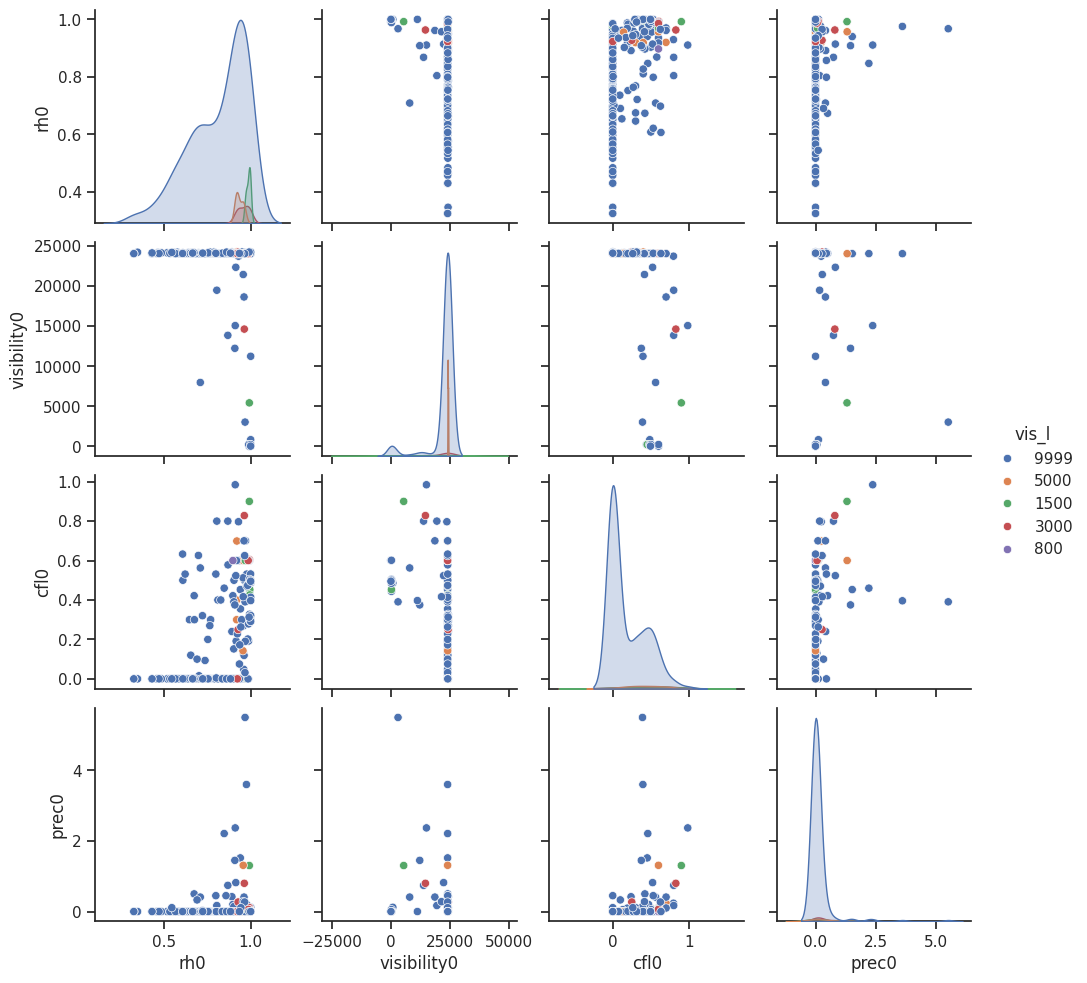

In [8]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["vis_l","rh0","visibility0","cfl0","prec0"]].sample(200), hue="vis_l");

**Scatter plot 3 PCA variables and vis_l**

In [9]:
df_all1k.iloc[:,1:-2].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'dir3', 'snow_prec3', 'snowlevel3', 'mod3', 'wind_gust3', 'mslp3',
       'temp3', 'rh3', 'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3',
       'prec3', 'swflx3', '

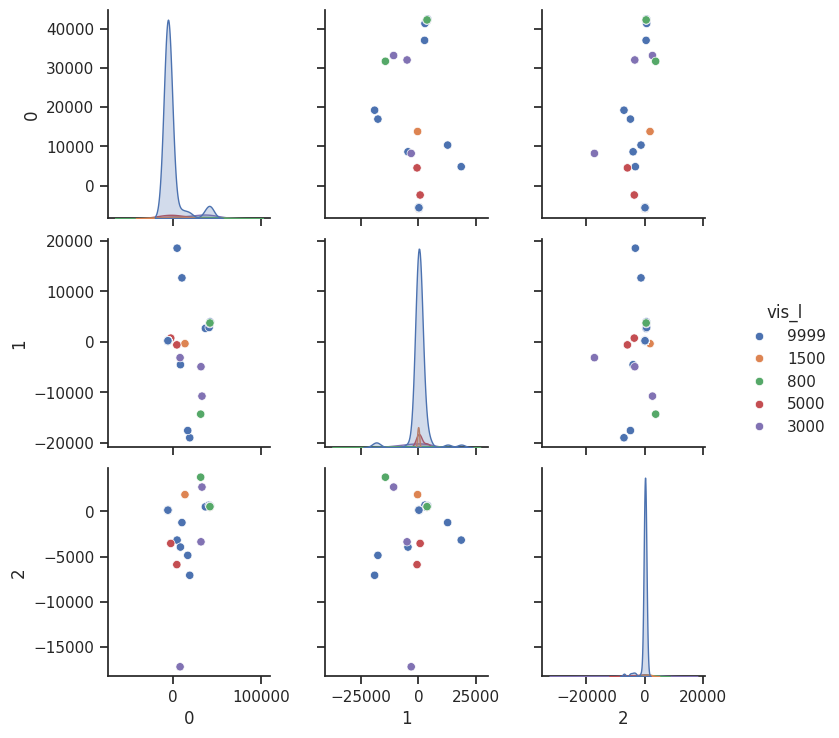

In [10]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:-2]),
                                                        index =df_all1k.index)
df_pca["vis_l"] = df_all1k.vis_l
sns.pairplot(df_pca.sample(100), hue="vis_l");

**Meteorological model score accuracy**

In [11]:
from sklearn.metrics import classification_report

# HSS point 0
print("\nConfusion matrix point 0")
cm = pd.crosstab(df_all1k.vis_l,df_all1k.visibility0_l ,margins=True,)
print(cm)


print("\nQuality report Meteorological model point 0")
print(pd.DataFrame(classification_report(df_all1k.vis_l,df_all1k.visibility0_l,output_dict=True)).T)

# HSS point 1
print("\nConfusion matrix point 1")
cm = pd.crosstab(df_all1k.vis_l,df_all1k.visibility1_l ,margins=True,)
print(cm)


print("\nQuality report Meteorological model point 1")
print(pd.DataFrame(classification_report(df_all1k.vis_l,df_all1k.visibility1_l,output_dict=True)).T)


Confusion matrix point 0
visibility0_l  1500  3000  5000   800   9999    All
vis_l                                              
1500             11     3     5   196    327    542
3000             48    20    46   466   1100   1680
5000             27    18    36   250    886   1217
800              11     3     3   356    394    767
9999            171   145   213  2392  34538  37459
All             268   189   303  3660  37245  41665

Quality report Meteorological model point 0
              precision    recall  f1-score       support
1500           0.041045  0.020295  0.027160    542.000000
3000           0.105820  0.011905  0.021402   1680.000000
5000           0.118812  0.029581  0.047368   1217.000000
800            0.097268  0.464146  0.160831    767.000000
9999           0.927319  0.922021  0.924663  37459.000000
accuracy       0.839098  0.839098  0.839098      0.839098
macro avg      0.258053  0.289590  0.236285  41665.000000
weighted avg   0.843770  0.839098  0.836880  4166

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [12]:
from scipy.stats import chi2_contingency

#only cm point 1 similar point 0

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:5,0:5])

#degrees of freedoom (rows-1)*(columns-1) to test association between two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Statistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between metmodel forecast and observed values")
else:
    print("Retain H0,There is no association between metmodel forecast and observed values")


p-value: 0.0
Significance level: 0.01
Degres of of freedom:  16
Statistic 3231.5967705131784
Reject H0,There is an association between metmodel forecast and observed values


In [13]:
df_all1k = df_all1k.drop(columns=["visibility0_l","visibility1_l"])
df_all1k

,vis_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,9999,203.429932,0.0,854.856445,4.810002,11.869287,102894.039062,280.189117,0.941392,24051.365234,...,0.000000,-0.000477,0.2,0.000000,0.000000,0.200000,5556.550781,1547.730957,249.389938,273.540863
2018-01-01 02:00:00,9999,215.205261,0.0,896.619629,5.700827,12.852463,102861.617188,280.347931,0.988324,24039.359375,...,26.730000,-14.053461,0.2,0.120898,0.000000,0.200000,5565.350098,1546.713013,249.959381,273.725189
2018-01-01 03:00:00,9999,224.525986,0.0,921.870178,7.366050,16.131567,102839.406250,281.068298,0.952302,24040.320312,...,30.040001,-11.045238,0.2,0.164062,0.000000,0.200000,5573.533203,1546.541992,250.329880,273.646881
2018-01-01 04:00:00,9999,227.065903,0.0,940.589844,8.982346,17.282509,102842.039062,281.655243,0.923813,24042.085938,...,32.810001,-8.397157,0.1,0.437500,0.000000,0.437500,5580.626953,1548.500977,250.527191,273.661194
2018-01-01 05:00:00,9999,231.667892,0.0,983.509766,10.026832,18.146084,102827.226562,282.484192,0.924759,24040.648438,...,58.730000,-4.643547,0.1,0.375000,0.000000,0.375000,5585.084961,1548.863037,250.680435,273.858765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 19:00:00,9999,206.390732,0.0,2074.267090,13.522949,21.508442,101436.859375,286.881622,0.966220,6238.053223,...,8.360000,-3.452000,0.2,0.828125,0.656250,0.828125,5584.145020,1486.342041,257.560760,280.863312
2022-12-30 20:00:00,9999,203.653366,0.0,2074.872559,13.675614,21.609047,101487.148438,286.931366,0.958984,9636.106445,...,9.360000,-1.589551,0.1,0.781250,0.671875,0.781250,5587.791992,1489.608032,257.591125,280.822876
2022-12-30 21:00:00,9999,203.530945,0.0,2036.689697,12.965158,20.540071,101528.273438,286.895935,0.955559,8634.944336,...,11.790000,-0.158887,0.1,0.890625,0.796875,0.890625,5590.491211,1491.394043,257.582001,280.443878


**Machine learning**

In [14]:
#x variables
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'dir3', 'snow_prec3', 'snowlevel3', 'mod3', 'wind_gust3', 'mslp3',
       'temp3', 'rh3', 'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3',
       'prec3', 'swflx3', '

**ML LGBMClassifier**

In [15]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_ml = []

for t in range (0,3):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #ml model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = BernoulliNB().fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)


  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)






Confusion matrix  (Machine Learning)

col_0  1500  3000  5000  800  9999   All
vis_l                                   
1500     23    25     7   18    46   119
3000     13   115    37   10   142   317
5000      4    43    42    8   152   249
800       8     6     2   68    59   143
9999     62   200   192  120  6931  7505
All     110   389   280  224  7330  8333

Quality report (Machine Learning)

              precision    recall  f1-score      support
1500           0.209091  0.193277  0.200873   119.000000
3000           0.295630  0.362776  0.325779   317.000000
5000           0.150000  0.168675  0.158790   249.000000
800            0.303571  0.475524  0.370572   143.000000
9999           0.945566  0.923518  0.934412  7505.000000
accuracy       0.861514  0.861514  0.861514     0.861514
macro avg      0.380772  0.424754  0.398085  8333.000000
weighted avg   0.875535  0.861514  0.867931  8333.000000

Confusion matrix  (Machine Learning)

col_0  1500  3000  5000  800  9999   All
vis_

**Add time features**

In [16]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

# variables X
df_all1k.iloc[:,1:].columns


Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object', length=104)

**LGBMClassifier with time variables**

In [17]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)

for t in range (0,3):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)




Confusion marix  (Machine Learning)

col_0  1500  3000  5000  800  9999   All
vis_l                                   
1500     22    23     9   23    42   119
3000     12   109    31    9   156   317
5000      2    46    35    6   160   249
800       7     7     2   73    54   143
9999     43   182   134  102  7044  7505
All      86   367   211  213  7456  8333

Quality report (Machine Learning)

              precision    recall  f1-score      support
1500           0.255814  0.184874  0.214634   119.000000
3000           0.297003  0.343849  0.318713   317.000000
5000           0.165877  0.140562  0.152174   249.000000
800            0.342723  0.510490  0.410112   143.000000
9999           0.944742  0.938574  0.941648  7505.000000
accuracy       0.873995  0.873995  0.873995     0.873995
macro avg      0.401232  0.423670  0.407456  8333.000000
weighted avg   0.876659  0.873995  0.874857  8333.000000

Confusion marix  (Machine Learning)

col_0  1500  3000  5000  800  9999   All
vis_l 

In [18]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")

dir0: 1.1%
snow_prec0: 0.0%
snowlevel0: 1.0%
mod0: 0.6%
wind_gust0: 0.7%
mslp0: 1.2%
temp0: 0.6%
rh0: 1.2%
visibility0: 2.8%
lhflx0: 0.9%
lwflx0: 0.8%
conv_prec0: 0.5%
prec0: 1.3%
swflx0: 0.7%
shflx0: 1.2%
cape0: 1.1%
cin0: 1.5%
cfh0: 0.7%
cfl0: 0.9%
cfm0: 0.9%
cft0: 0.7%
HGT5000: 0.8%
HGT8500: 0.8%
T5000: 0.9%
T8500: 0.9%
dir1: 1.2%
snow_prec1: 0.0%
snowlevel1: 1.1%
mod1: 0.6%
wind_gust1: 1.0%
mslp1: 1.1%
temp1: 0.8%
rh1: 1.2%
visibility1: 2.7%
lhflx1: 1.0%
lwflx1: 0.7%
conv_prec1: 0.6%
prec1: 1.7%
swflx1: 0.8%
shflx1: 1.2%
cape1: 1.0%
cin1: 1.3%
cfh1: 1.0%
cfl1: 1.0%
cfm1: 0.8%
cft1: 1.0%
HGT5001: 0.7%
HGT8501: 0.7%
T5001: 0.8%
T8501: 0.8%
dir2: 1.2%
snow_prec2: 0.0%
snowlevel2: 1.2%
mod2: 0.8%
wind_gust2: 0.9%
mslp2: 1.2%
temp2: 0.7%
rh2: 1.1%
visibility2: 2.8%
lhflx2: 1.0%
lwflx2: 0.9%
conv_prec2: 0.6%
prec2: 1.4%
swflx2: 0.7%
shflx2: 1.0%
cape2: 1.0%
cin2: 1.7%
cfh2: 0.9%
cfl2: 0.9%
cfm2: 0.5%
cft2: 1.1%
HGT5002: 0.9%
HGT8502: 0.9%
T5002: 0.6%
T8502: 1.0%
dir3: 1.1%
snow_prec3: 0.

In [19]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEST/algorithms/llmvis_LEST_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])
